In [1]:
#After predicting disordered residues with iupred,
#each string of contiguous disordered residues was
#saved an item in a dictionary. Likewise, there is 
#a dictionary for all ordered domains and a
#dictionary that contains the entirety of every
#proteins sequence proteome-wide. These dictionaries
#were then exported as a pickle bundle which this
#bit of code unpacks and converts to a dictinary.

import pickle as pkl

disorderdictionary = open('UP000000803DisorderDict.pkl', 'rb')
ProteomeDisorderDict = pkl.load(disorderdictionary)

orderdictionary = open('UP000000803OrderDict.pkl', 'rb')
ProteomeOrderDict = pkl.load(orderdictionary)

proteomedictionary = open('UP000000803ProteomeDict.pkl', 'rb')
ProteomeDict =  pkl.load(proteomedictionary)

In [2]:
from localcider.sequenceParameters import SequenceParameters as sp
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

def kappa_dict(prot_dict):
    #prints out dict of idr with kappa
    k_dict = {}
    while True:
        key = random.choice(list(prot_dict))
        if 'U' in prot_dict[key] or 'X' in prot_dict[key] or key in k_dict:
            kappa = None
        elif len(prot_dict[key]) > 100:
            sequence_parameters = sp(prot_dict[key])
            kappa = sequence_parameters.get_kappa()
            k_dict[key] = kappa
        if len(list(k_dict)) == 250:
            return k_dict

def kappa_nested_dict(nested_prot_dict):
    nested_k_dict = {}
    while True:
        prot_dict = random.choice(list(nested_prot_dict))
        if prot_dict not in nested_k_dict:
            for region in nested_prot_dict[prot_dict]:
                if 'U' in nested_prot_dict[prot_dict][region] or 'X' in nested_prot_dict[prot_dict][region]:
                    kappa = None
                elif len(nested_prot_dict[prot_dict][region]) > 100:
                    sequence_parameters = sp(nested_prot_dict[prot_dict][region])
                    kappa = sequence_parameters.get_kappa()
                    nested_k_dict[prot_dict + str(region)] = kappa
                if len(list(nested_k_dict)) == 250:
                    return nested_k_dict

In [3]:
proteome_kappa = kappa_dict(ProteomeDict)

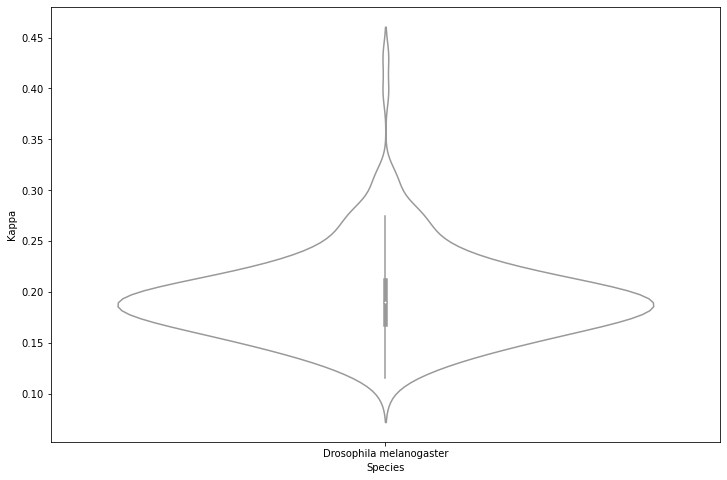

In [9]:
data = []
for key in proteome_kappa:
    data.append([key, proteome_kappa[key], 'Drosophila melanogaster'])
labels = ['Name', 'Kappa', 'Species']
table1 = pd.DataFrame(data, columns=labels, dtype=float)

fig1 = plt.gcf()
fig1.set_size_inches(12, 8)
sb.violinplot(x = 'Species', y = 'Kappa', data = table1, color='white')
plt.savefig('Kappa Values of 250 Drosophila Proteins.png')
plt.show()

In [5]:
disoderome_kappa = kappa_nested_dict(ProteomeDisorderDict)

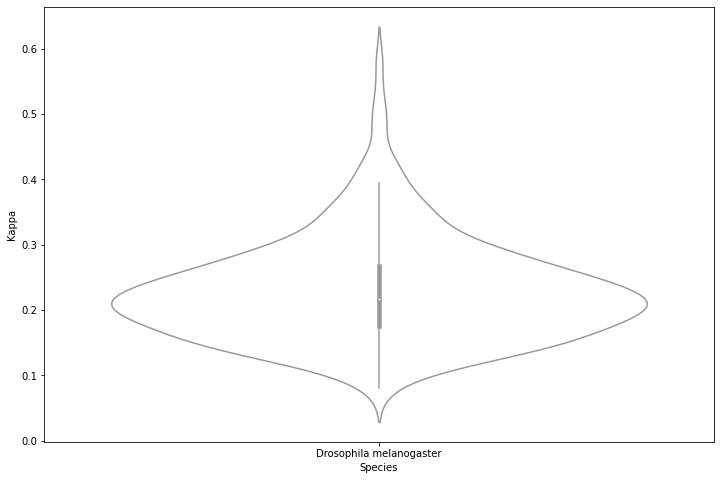

In [10]:
data = []
for key in disoderome_kappa:
    data.append([key, disoderome_kappa[key], 'Drosophila melanogaster'])
labels = ['Name', 'Kappa', 'Species']
table2 = pd.DataFrame(data, columns=labels, dtype=float)

fig1 = plt.gcf()
fig1.set_size_inches(12, 8)
sb.violinplot(x = 'Species', y = 'Kappa', data = table2, color='white')
plt.savefig('Kappa Values of 250 Disordered Drosophila Protein Regions.png')
plt.show()

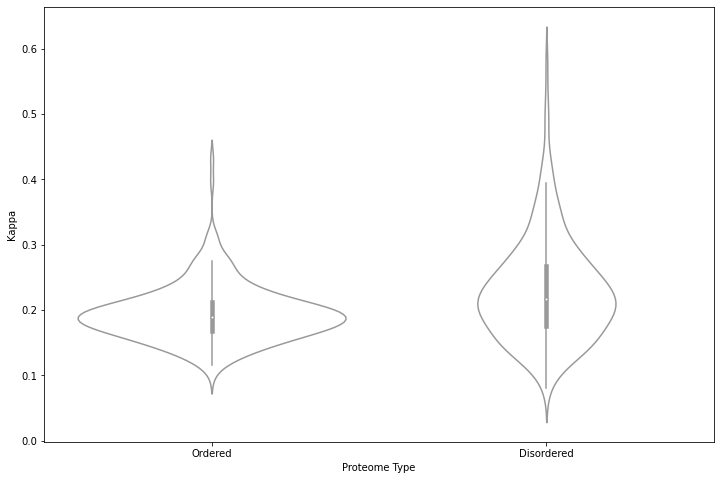

In [13]:
table1['Proteome Type'] = 'Ordered'
table2['Proteome Type'] = 'Disordered'
combined_kappa = table1.append(table2)

fig1 = plt.gcf()
fig1.set_size_inches(12, 8)
sb.violinplot(x = 'Proteome Type', y = 'Kappa', data = combined_kappa, color='white')
plt.savefig('Kappa side-by-side Violin Plot.png')
plt.show()